In [ ]:
import numpy as np

In [ ]:


docs = ['go india',
		'india india',
		'hip hip hurray',
		'jeetega bhai jeetega india jeetega',
		'bharat mata ki jai',
		'kohli kohli',
		'sachin sachin',
		'dhoni dhoni',
		'modi ji ki jai',
		'inquilab zindabad']

In [ ]:
from keras.preprocessing.text import Tokenizer
tokenizer  = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(docs)

In [ ]:
tokenizer.word_index

{'<OOV>': 1,
 'india': 2,
 'jeetega': 3,
 'hip': 4,
 'ki': 5,
 'jai': 6,
 'kohli': 7,
 'sachin': 8,
 'dhoni': 9,
 'go': 10,
 'hurray': 11,
 'bhai': 12,
 'bharat': 13,
 'mata': 14,
 'modi': 15,
 'ji': 16,
 'inquilab': 17,
 'zindabad': 18}

In [ ]:
tokenizer.word_counts

OrderedDict([('go', 1),
             ('india', 4),
             ('hip', 2),
             ('hurray', 1),
             ('jeetega', 3),
             ('bhai', 1),
             ('bharat', 1),
             ('mata', 1),
             ('ki', 2),
             ('jai', 2),
             ('kohli', 2),
             ('sachin', 2),
             ('dhoni', 2),
             ('modi', 1),
             ('ji', 1),
             ('inquilab', 1),
             ('zindabad', 1)])

In [ ]:
tokenizer.document_count

10

In [ ]:
sequences = tokenizer.texts_to_sequences(docs)
sequences

[[10, 2],
 [2, 2],
 [4, 4, 11],
 [3, 12, 3, 2, 3],
 [13, 14, 5, 6],
 [7, 7],
 [8, 8],
 [9, 9],
 [15, 16, 5, 6],
 [17, 18]]

In [ ]:
from keras.utils import pad_sequences
padded_sequences = pad_sequences(sequences, padding='post')
padded_sequences

NameError: name 'sequences' is not defined

In [ ]:
word_index = tokenizer.word_index
max_words = len(word_index) + 1

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=2, input_length=5))  # Use max_words
model.add(Flatten())

model.predict(padded_sequences)

1/1 [==============================] - 0s 68ms/step


array([[-0.03684987, -0.00055716,  0.01255722,  0.0009829 ,  0.02426266,
         0.04489309,  0.02426266,  0.04489309,  0.02426266,  0.04489309],
       [ 0.01255722,  0.0009829 ,  0.01255722,  0.0009829 ,  0.02426266,
         0.04489309,  0.02426266,  0.04489309,  0.02426266,  0.04489309],
       [-0.04116151, -0.00852414, -0.04116151, -0.00852414, -0.01342261,
         0.03763377,  0.02426266,  0.04489309,  0.02426266,  0.04489309],
       [ 0.00657801, -0.04251493, -0.03195082, -0.02536128,  0.00657801,
        -0.04251493,  0.01255722,  0.0009829 ,  0.00657801, -0.04251493],
       [ 0.04814151,  0.0410636 ,  0.04962126, -0.02961729,  0.00351866,
         0.03681345, -0.03314351,  0.01332727,  0.02426266,  0.04489309],
       [-0.00150458, -0.02955631, -0.00150458, -0.02955631,  0.02426266,
         0.04489309,  0.02426266,  0.04489309,  0.02426266,  0.04489309],
       [-0.0281226 , -0.04311604, -0.0281226 , -0.04311604,  0.02426266,
         0.04489309,  0.02426266,  0.04489309

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
from os import X_OK
from keras.datasets import imdb
from keras import Sequential
from keras.layers import Dense, SimpleRNN, Embedding, Flatten
(X_train, y_train), (X_test, y_test) = imdb.load_data()

17464789/17464789 [==============================] - 1s 0us/step


In [ ]:
X_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 22665,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 21631,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 31050,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5

In [ ]:
len(X_train[0])

218

In [ ]:
len(X_train)

25000

In [ ]:
len(X_test[0])

68

In [ ]:
X_train = pad_sequences(X_train,padding = 'post', maxlen=50)
X_test = pad_sequences(X_test,padding = 'post', maxlen=50)

In [ ]:
len(X_train[0])

50

In [ ]:
X_train.shape

(25000, 50)

In [ ]:
X_train

array([[ 2071,    56,    26, ...,    19,   178,    32],
       [ 8255,     5, 25249, ...,    16,   145,    95],
       [  215,    28,   610, ...,     7,   129,   113],
       ...,
       [    4,    65,   496, ...,     4,  3586, 22459],
       [   13,    18,    31, ...,    12,     9,    23],
       [ 7585,     8,  2197, ...,   204,   131,     9]], dtype=int32)

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=500000, output_dim=2, input_length=50))
model.add(SimpleRNN(32,return_sequences=False))
model.add(Dense(1, activation='sigmoid'))



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 2)             1000000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                1120      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 1001153 (3.82 MB)
Trainable params: 1001153 (3.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=5,validation_data=(X_test, y_test))

Epoch 1/5
782/782 [==============================] - 25s 30ms/step - loss: 0.6250 - accuracy: 0.6190 - val_loss: 0.4621 - val_accuracy: 0.7862
Epoch 2/5
782/782 [==============================] - 25s 31ms/step - loss: 0.3838 - accuracy: 0.8318 - val_loss: 0.4206 - val_accuracy: 0.8135
Epoch 3/5
782/782 [==============================] - 22s 28ms/step - loss: 0.2565 - accuracy: 0.9000 - val_loss: 0.4780 - val_accuracy: 0.8033
Epoch 4/5
782/782 [==============================] - 22s 28ms/step - loss: 0.1816 - accuracy: 0.9352 - val_loss: 0.4879 - val_accuracy: 0.7974
Epoch 5/5
782/782 [==============================] - 22s 29ms/step - loss: 0.1328 - accuracy: 0.9537 - val_loss: 0.6563 - val_accuracy: 0.7846


In [ ]:
import pandas as pd;
import matplotlib.pyplot as plt
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import RNN, SimpleRNN
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.layers import Dropout
from keras.optimizers import Adam

from keras.callbacks import LambdaCallback
from sklearn.preprocessing import MinMaxScaler

In [ ]:
!kaggle datasets download -d lakshmi25npathi/bike-sharing-dataset

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset
License(s): unknown
bike-sharing-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/bike-sharing-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
data = pd.read_csv("/content/day.csv")
data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


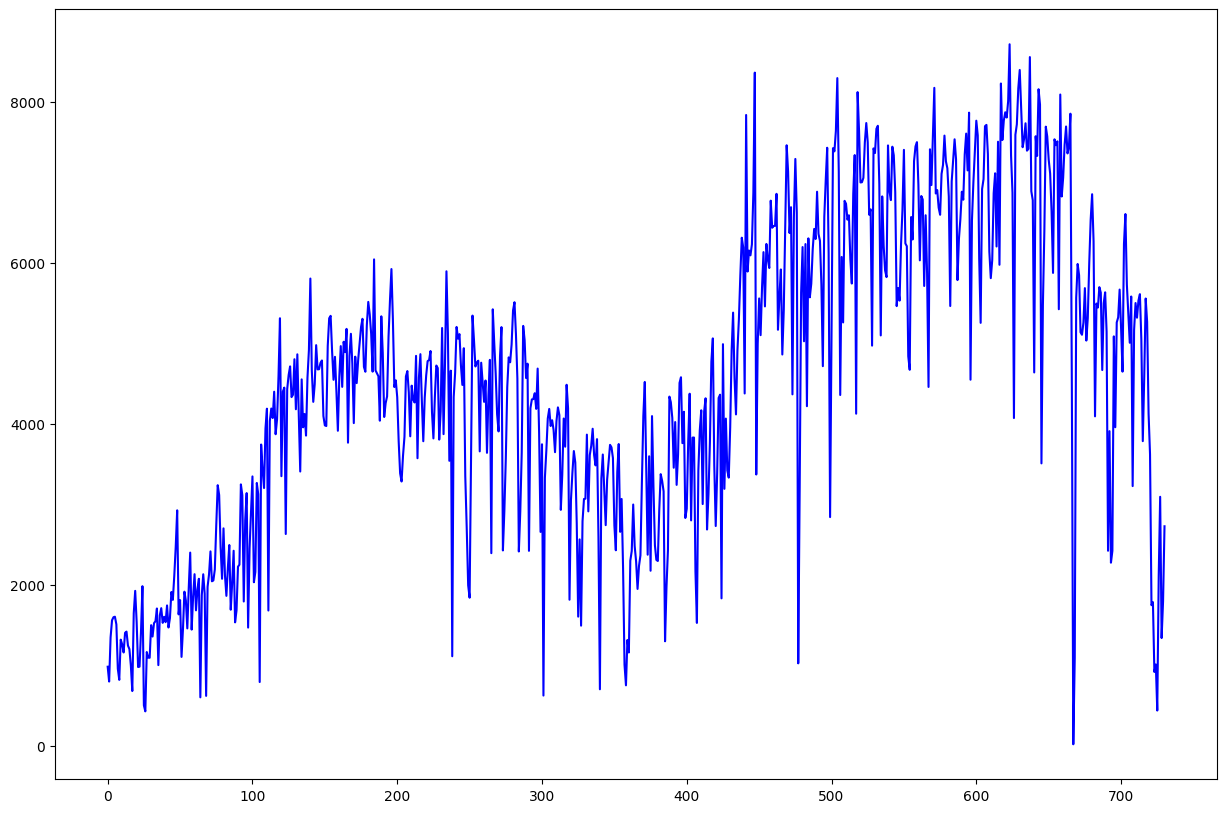

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(data['cnt'], color='blue')
plt.show()

In [ ]:
one_hot = pd.get_dummies(data['weekday'], prefix='weekday')
data = data.join(one_hot)
one_hot2 = pd.get_dummies(data['weathersit'], prefix='weathersit')
data = data.join(one_hot2)

In [ ]:

one_hot3 = pd.get_dummies(data['mnth'], prefix='mnth')
data = data.join(one_hot3)

In [ ]:
data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,False,False,False,False,False,False,False,False,False,False
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,False,False,False,False,False,False,False,False,False,False
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,False,False,False,False,False,False,False,False,False,False
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,False,False,False,False,False,False,False,False,False,False
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,...,False,False,False,False,False,False,False,False,False,True
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,...,False,False,False,False,False,False,False,False,False,True
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,...,False,False,False,False,False,False,False,False,False,True
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
bool_cols = data.select_dtypes(include='bool').columns
data[bool_cols] = data[bool_cols].astype(int)

In [ ]:
data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0,0,0,0,0,0,0,0,0,0
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,0,0,0,0,0,0,0,0,0,0
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,0,0,0,0,0,0,0,0,0,0
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,0,0,0,0,0,0,0,0,0,0
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,...,0,0,0,0,0,0,0,0,0,1
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,...,0,0,0,0,0,0,0,0,0,1
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,...,0,0,0,0,0,0,0,0,0,1
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,...,0,0,0,0,0,0,0,0,0,1


In [ ]:

scaler = MinMaxScaler()

# Select the column to scale (e.g., column 'B')
column_to_scale = 'cnt'

# Reshape the column to 2D array
values = data[[column_to_scale]].values

# Fit and transform the values using MinMaxScaler
scaled_values = scaler.fit_transform(values)

# Replace the original column with the scaled values
data[column_to_scale] = scaled_values

In [ ]:
data['cnt']

0      0.110792
1      0.089623
2      0.152669
3      0.177174
4      0.181546
         ...   
726    0.240681
727    0.353543
728    0.151749
729    0.204096
730    0.311436
Name: cnt, Length: 731, dtype: float64

In [ ]:
data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0,0,0,0,0,0,0,0,0,0
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,0,0,0,0,0,0,0,0,0,0
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,0,0,0,0,0,0,0,0,0,0
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,0,0,0,0,0,0,0,0,0,0
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,...,0,0,0,0,0,0,0,0,0,1
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,...,0,0,0,0,0,0,0,0,0,1
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,...,0,0,0,0,0,0,0,0,0,1
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
number_of_test_data = 50
number_of_holdout_data = 50
number_of_training_data = len(data) - number_of_holdout_data - number_of_test_data

In [ ]:
datatrain = data[:number_of_training_data]
datatest = data[-(number_of_test_data+number_of_holdout_data):-number_of_holdout_data]
datahold = data[-number_of_holdout_data:]

In [ ]:
datatrain['cnt']

0      0.110792
1      0.089623
2      0.152669
3      0.177174
4      0.181546
         ...   
626    0.466061
627    0.870801
628    0.885642
629    0.937069
630    0.963300
Name: cnt, Length: 631, dtype: float64

In [ ]:
datatrain

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0,0,0,0,0,0,0,0,0,0
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,0,0,0,0,0,0,0,0,0,0
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,0,0,0,0,0,0,0,0,0,0
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,0,0,0,0,0,0,0,0,0,0
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,627,2012-09-18,3,1,9,0,2,1,2,0.623333,...,0,0,0,0,0,0,1,0,0,0
627,628,2012-09-19,3,1,9,0,3,1,1,0.552500,...,0,0,0,0,0,0,1,0,0,0
628,629,2012-09-20,3,1,9,0,4,1,1,0.546667,...,0,0,0,0,0,0,1,0,0,0
629,630,2012-09-21,3,1,9,0,5,1,1,0.599167,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
datatest

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12
631,632,2012-09-23,4,1,9,0,0,0,1,0.529167,...,0,0,0,0,0,0,1,0,0,0
632,633,2012-09-24,4,1,9,0,1,1,1,0.514167,...,0,0,0,0,0,0,1,0,0,0
633,634,2012-09-25,4,1,9,0,2,1,1,0.550000,...,0,0,0,0,0,0,1,0,0,0
634,635,2012-09-26,4,1,9,0,3,1,1,0.635000,...,0,0,0,0,0,0,1,0,0,0
635,636,2012-09-27,4,1,9,0,4,1,2,0.650000,...,0,0,0,0,0,0,1,0,0,0
636,637,2012-09-28,4,1,9,0,5,1,2,0.619167,...,0,0,0,0,0,0,1,0,0,0
637,638,2012-09-29,4,1,9,0,6,0,1,0.542500,...,0,0,0,0,0,0,1,0,0,0
638,639,2012-09-30,4,1,9,0,0,0,1,0.526667,...,0,0,0,0,0,0,1,0,0,0
639,640,2012-10-01,4,1,10,0,1,1,2,0.520833,...,0,0,0,0,0,0,0,1,0,0
640,641,2012-10-02,4,1,10,0,2,1,3,0.590833,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
datahold

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12
681,682,2012-11-12,4,1,11,1,1,0,1,0.485000,...,0,0,0,0,0,0,0,0,1,0
682,683,2012-11-13,4,1,11,0,2,1,2,0.343333,...,0,0,0,0,0,0,0,0,1,0
683,684,2012-11-14,4,1,11,0,3,1,1,0.289167,...,0,0,0,0,0,0,0,0,1,0
684,685,2012-11-15,4,1,11,0,4,1,2,0.321667,...,0,0,0,0,0,0,0,0,1,0
685,686,2012-11-16,4,1,11,0,5,1,1,0.345000,...,0,0,0,0,0,0,0,0,1,0
686,687,2012-11-17,4,1,11,0,6,0,1,0.325000,...,0,0,0,0,0,0,0,0,1,0
687,688,2012-11-18,4,1,11,0,0,0,1,0.342500,...,0,0,0,0,0,0,0,0,1,0
688,689,2012-11-19,4,1,11,0,1,1,2,0.380833,...,0,0,0,0,0,0,0,0,1,0
689,690,2012-11-20,4,1,11,0,2,1,2,0.374167,...,0,0,0,0,0,0,0,0,1,0
690,691,2012-11-21,4,1,11,0,3,1,1,0.353333,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
in_seq1 = array(datatrain['holiday'])
in_seq2 = array(datatrain['workingday'])
in_seq3 = array(datatrain['temp'])
in_seq4 = array(datatrain['atemp'])
in_seq5 = array(datatrain['hum'])
in_seq6 = array(datatrain['windspeed'])
in_seq7 = array(datatrain['weekday_0'])
in_seq8 = array(datatrain['weekday_1'])
in_seq9 = array(datatrain['weekday_2'])
in_seq10 = array(datatrain['weekday_3'])
in_seq11 = array(datatrain['weekday_4'])
in_seq12 = array(datatrain['weekday_5'])
in_seq13 = array(datatrain['weekday_6'])
in_seq14 = array(datatrain['weathersit_1'])
in_seq15 = array(datatrain['weathersit_2'])
in_seq16 = array(datatrain['weathersit_3'])
out_seq_train = array(datatrain['cnt'])

In [ ]:
in_seq1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
in_seq3 = in_seq3.reshape((len(in_seq3), 1))
in_seq4 = in_seq4.reshape((len(in_seq4), 1))
in_seq5 = in_seq5.reshape((len(in_seq5), 1))
in_seq6 = in_seq6.reshape((len(in_seq6), 1))
in_seq7 = in_seq7.reshape((len(in_seq7), 1))
in_seq8 = in_seq8.reshape((len(in_seq8), 1))
in_seq9 = in_seq9.reshape((len(in_seq9), 1))
in_seq10 = in_seq10.reshape((len(in_seq10), 1))
in_seq11 = in_seq11.reshape((len(in_seq11), 1))
in_seq12 = in_seq12.reshape((len(in_seq12), 1))
in_seq13 = in_seq13.reshape((len(in_seq13), 1))
in_seq14 = in_seq14.reshape((len(in_seq14), 1))
in_seq15 = in_seq15.reshape((len(in_seq15), 1))
in_seq16 = in_seq16.reshape((len(in_seq16), 1))
out_seq_train = out_seq_train.reshape((len(out_seq_train), 1))

In [ ]:
in_seq1

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [ ]:
datatrain_feed = hstack((in_seq1, in_seq2, in_seq3, in_seq4, in_seq5, in_seq6, in_seq7, in_seq8, in_seq9, in_seq10, in_seq11, in_seq12, in_seq13, in_seq14, in_seq15, in_seq16, out_seq_train))

In [ ]:
datatrain_feed

array([[0.        , 0.        , 0.344167  , ..., 1.        , 0.        ,
        0.11079153],
       [0.        , 0.        , 0.363478  , ..., 1.        , 0.        ,
        0.08962264],
       [0.        , 1.        , 0.196364  , ..., 0.        , 0.        ,
        0.15266912],
       ...,
       [0.        , 1.        , 0.546667  , ..., 0.        , 0.        ,
        0.88564197],
       [0.        , 1.        , 0.599167  , ..., 0.        , 0.        ,
        0.93706857],
       [0.        , 0.        , 0.65      , ..., 0.        , 0.        ,
        0.96329959]])

In [ ]:
in_seq1 = array(datatest['holiday'])
in_seq2 = array(datatest['workingday'])
in_seq3 = array(datatest['temp'])
in_seq4 = array(datatest['atemp'])
in_seq5 = array(datatest['hum'])
in_seq6 = array(datatest['windspeed'])
in_seq7 = array(datatest['weekday_0'])
in_seq8 = array(datatest['weekday_1'])
in_seq9 = array(datatest['weekday_2'])
in_seq10 = array(datatest['weekday_3'])
in_seq11 = array(datatest['weekday_4'])
in_seq12 = array(datatest['weekday_5'])
in_seq13 = array(datatest['weekday_6'])
in_seq14 = array(datatest['weathersit_1'])
in_seq15 = array(datatest['weathersit_2'])
in_seq16 = array(datatest['weathersit_3'])
out_seq_test = array(datatest['cnt'])

In [ ]:
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
in_seq3 = in_seq3.reshape((len(in_seq3), 1))
in_seq4 = in_seq4.reshape((len(in_seq4), 1))
in_seq5 = in_seq5.reshape((len(in_seq5), 1))
in_seq6 = in_seq6.reshape((len(in_seq6), 1))
in_seq7 = in_seq7.reshape((len(in_seq7), 1))
in_seq8 = in_seq8.reshape((len(in_seq8), 1))
in_seq9 = in_seq9.reshape((len(in_seq9), 1))
in_seq10 = in_seq10.reshape((len(in_seq10), 1))
in_seq11 = in_seq11.reshape((len(in_seq11), 1))
in_seq12 = in_seq12.reshape((len(in_seq12), 1))
in_seq13 = in_seq13.reshape((len(in_seq13), 1))
in_seq14 = in_seq14.reshape((len(in_seq14), 1))
in_seq15 = in_seq15.reshape((len(in_seq15), 1))
in_seq16 = in_seq16.reshape((len(in_seq16), 1))
out_seq_test = out_seq_test.reshape((len(out_seq_test), 1))
datatest_feed = hstack((in_seq1, in_seq2, in_seq3, in_seq4, in_seq5, in_seq6, in_seq7, in_seq8, in_seq9, in_seq10, in_seq11, in_seq12, in_seq13, in_seq14, in_seq15, in_seq16, out_seq_test))

In [ ]:
datatest_feed

array([[0.        , 0.        , 0.529167  , 0.518933  , 0.467083  ,
        0.223258  , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.90715601],
       [0.        , 1.        , 0.514167  , 0.502513  , 0.492917  ,
        0.142404  , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.85296825],
       [0.        , 1.        , 0.55      , 0.544179  , 0.57      ,
        0.236321  , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.86470318],
       [0.        , 1.        , 0.635     , 0.596613  , 0.630833  ,
        0.2444    , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.8871376 ],
       [0.        , 1.        , 0.65      , 0.607975

In [ ]:
in_seq1 = array(datahold['holiday'])
in_seq2 = array(datahold['workingday'])
in_seq3 = array(datahold['temp'])
in_seq4 = array(datahold['atemp'])
in_seq5 = array(datahold['hum'])
in_seq6 = array(datahold['windspeed'])
in_seq7 = array(datahold['weekday_0'])
in_seq8 = array(datahold['weekday_1'])
in_seq9 = array(datahold['weekday_2'])
in_seq10 = array(datahold['weekday_3'])
in_seq11 = array(datahold['weekday_4'])
in_seq12 = array(datahold['weekday_5'])
in_seq13 = array(datahold['weekday_6'])
in_seq14 = array(datahold['weathersit_1'])
in_seq15 = array(datahold['weathersit_2'])
in_seq16 = array(datahold['weathersit_3'])
out_seq_hold = array(datahold['cnt'])
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
in_seq3 = in_seq3.reshape((len(in_seq3), 1))
in_seq4 = in_seq4.reshape((len(in_seq4), 1))
in_seq5 = in_seq5.reshape((len(in_seq5), 1))
in_seq6 = in_seq6.reshape((len(in_seq6), 1))
in_seq7 = in_seq7.reshape((len(in_seq7), 1))
in_seq8 = in_seq8.reshape((len(in_seq8), 1))
in_seq9 = in_seq9.reshape((len(in_seq9), 1))
in_seq10 = in_seq10.reshape((len(in_seq10), 1))
in_seq11 = in_seq11.reshape((len(in_seq11), 1))
in_seq12 = in_seq12.reshape((len(in_seq12), 1))
in_seq13 = in_seq13.reshape((len(in_seq13), 1))
in_seq14 = in_seq14.reshape((len(in_seq14), 1))
in_seq15 = in_seq15.reshape((len(in_seq15), 1))
in_seq16 = in_seq16.reshape((len(in_seq16), 1))
out_seq_hold = out_seq_hold.reshape((len(out_seq_hold), 1))
datahold_feed = hstack((in_seq1, in_seq2, in_seq3, in_seq4, in_seq5, in_seq6, in_seq7, in_seq8, in_seq9, in_seq10, in_seq11, in_seq12, in_seq13, in_seq14, in_seq15, in_seq16, out_seq_hold))

In [ ]:
datahold_feed

array([[1.        , 0.        , 0.485     , 0.475383  , 0.741667  ,
        0.173517  , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.71870686],
       [0.        , 1.        , 0.343333  , 0.323225  , 0.662917  ,
        0.342046  , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.46847676],
       [0.        , 1.        , 0.289167  , 0.281563  , 0.552083  ,
        0.199625  , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.62965946],
       [0.        , 1.        , 0.321667  , 0.324492  , 0.620417  ,
        0.152987  , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.62390704],
       [0.        , 1.        , 0.345     , 0.347204

In [ ]:
generator_train = TimeseriesGenerator(datatrain_feed, out_seq_train, length=10, batch_size=len(datatrain_feed))
generator_test = TimeseriesGenerator(datatest_feed, out_seq_test, length=10, batch_size=1)
generator_hold = TimeseriesGenerator(datahold_feed, out_seq_hold, length=10, batch_size=1)


In [ ]:
generator_train

In [ ]:
model = Sequential()

model.add(SimpleRNN(4, activation='relu', input_shape=(10, 17), return_sequences = False))
model.add(Dense(1, activation='relu'))

In [ ]:
adam = Adam(lr=0.0001)
model2.compile(optimizer=adam, loss='mse')

In [ ]:
adam = Adam(lr=0.0001)
model.compile(optimizer=adam, loss='mse')


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 4)                 88        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 93 (372.00 Byte)
Trainable params: 93 (372.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit_generator(generator_train, epochs=3000, verbose=0, validation_data=generator_test)

<ipython-input-86-c5013cadec0e>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator_train, epochs=3000, verbose=0, validation_data=generator_test)


In [ ]:
model.predict_generator(generator_hold)

<ipython-input-87-cd98fffc8c86>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  model.predict_generator(generator_hold)


array([[0.6371176 ],
       [0.5970729 ],
       [0.5888329 ],
       [0.48516387],
       [0.3959365 ],
       [0.5031416 ],
       [0.50802   ],
       [0.54976815],
       [0.56473804],
       [0.55499953],
       [0.53381264],
       [0.54898614],
       [0.6140841 ],
       [0.66847223],
       [0.6818123 ],
       [0.6648512 ],
       [0.6074128 ],
       [0.5928634 ],
       [0.55495036],
       [0.54339427],
       [0.56018317],
       [0.5801855 ],
       [0.5962977 ],
       [0.5765322 ],
       [0.53539664],
       [0.50339675],
       [0.5353785 ],
       [0.58427453],
       [0.5908089 ],
       [0.5680195 ],
       [0.49663085],
       [0.40019137],
       [0.30963892],
       [0.32070494],
       [0.22252195],
       [0.1857355 ],
       [0.21164507],
       [0.28943855],
       [0.23568863],
       [0.281421  ]], dtype=float32)

In [ ]:
df_result = pd.DataFrame({'Actual' : [], 'Prediction' : []})

for i in range(len(generator_test)):
    x, y = generator_test[i]
    x_input = array(x).reshape((1, 10,17))
    yhat = model.predict(x_input, verbose=2)
    # Use concat instead of append
    df_result = pd.concat([df_result, pd.DataFrame({'Actual': [scaler.inverse_transform(y)[0][0]], 'Prediction': [scaler.inverse_transform(yhat)[0][0]]})], ignore_index=True)

1/1 - 0s - 137ms/epoch - 137ms/step
1/1 - 0s - 18ms/epoch - 18ms/step
1/1 - 0s - 18ms/epoch - 18ms/step
1/1 - 0s - 18ms/epoch - 18ms/step
1/1 - 0s - 19ms/epoch - 19ms/step
1/1 - 0s - 18ms/epoch - 18ms/step
1/1 - 0s - 18ms/epoch - 18ms/step
1/1 - 0s - 18ms/epoch - 18ms/step
1/1 - 0s - 18ms/epoch - 18ms/step
1/1 - 0s - 18ms/epoch - 18ms/step
1/1 - 0s - 22ms/epoch - 22ms/step
1/1 - 0s - 18ms/epoch - 18ms/step
1/1 - 0s - 18ms/epoch - 18ms/step
1/1 - 0s - 19ms/epoch - 19ms/step
1/1 - 0s - 20ms/epoch - 20ms/step
1/1 - 0s - 26ms/epoch - 26ms/step
1/1 - 0s - 20ms/epoch - 20ms/step
1/1 - 0s - 18ms/epoch - 18ms/step
1/1 - 0s - 19ms/epoch - 19ms/step
1/1 - 0s - 19ms/epoch - 19ms/step
1/1 - 0s - 20ms/epoch - 20ms/step
1/1 - 0s - 19ms/epoch - 19ms/step
1/1 - 0s - 19ms/epoch - 19ms/step
1/1 - 0s - 19ms/epoch - 19ms/step
1/1 - 0s - 19ms/epoch - 19ms/step
1/1 - 0s - 18ms/epoch - 18ms/step
1/1 - 0s - 18ms/epoch - 18ms/step
1/1 - 0s - 19ms/epoch - 19ms/step
1/1 - 0s - 19ms/epoch - 19ms/step
1/1 - 0s - 2

In [ ]:
df_result

,Actual,Prediction
0,7572.0,6400.564941
1,7328.0,6761.618164
2,8156.0,7060.879395
3,7965.0,7246.132812
4,3510.0,7202.030273
5,5478.0,6103.446289
6,6392.0,5562.016602
7,7691.0,5670.178711
8,7570.0,6150.617676
9,7282.0,6576.916992


In [ ]:
df_result = pd.DataFrame({'Actual' : [], 'Prediction' : []})

for i in range(len(generator_hold)):
    x, y = generator_hold[i]
    x_input = array(x).reshape((1, 10,17))
    yhat = model.predict(x_input, verbose=2)
    # Use concat instead of append
    df_result = pd.concat([df_result, pd.DataFrame({'Actual': [scaler.inverse_transform(y)[0][0]], 'Prediction': [scaler.inverse_transform(yhat)[0][0]]})], ignore_index=True)

1/1 - 0s - 20ms/epoch - 20ms/step
1/1 - 0s - 20ms/epoch - 20ms/step
1/1 - 0s - 19ms/epoch - 19ms/step
1/1 - 0s - 19ms/epoch - 19ms/step
1/1 - 0s - 19ms/epoch - 19ms/step
1/1 - 0s - 19ms/epoch - 19ms/step
1/1 - 0s - 19ms/epoch - 19ms/step
1/1 - 0s - 19ms/epoch - 19ms/step
1/1 - 0s - 19ms/epoch - 19ms/step
1/1 - 0s - 19ms/epoch - 19ms/step
1/1 - 0s - 20ms/epoch - 20ms/step
1/1 - 0s - 19ms/epoch - 19ms/step
1/1 - 0s - 19ms/epoch - 19ms/step
1/1 - 0s - 19ms/epoch - 19ms/step
1/1 - 0s - 22ms/epoch - 22ms/step
1/1 - 0s - 19ms/epoch - 19ms/step
1/1 - 0s - 20ms/epoch - 20ms/step
1/1 - 0s - 19ms/epoch - 19ms/step
1/1 - 0s - 26ms/epoch - 26ms/step
1/1 - 0s - 19ms/epoch - 19ms/step
1/1 - 0s - 19ms/epoch - 19ms/step
1/1 - 0s - 19ms/epoch - 19ms/step
1/1 - 0s - 19ms/epoch - 19ms/step
1/1 - 0s - 21ms/epoch - 21ms/step
1/1 - 0s - 19ms/epoch - 19ms/step
1/1 - 0s - 25ms/epoch - 25ms/step
1/1 - 0s - 20ms/epoch - 20ms/step
1/1 - 0s - 18ms/epoch - 18ms/step
1/1 - 0s - 19ms/epoch - 19ms/step
1/1 - 0s - 19m

In [ ]:
df_result

,Actual,Prediction
0,2425.0,5559.826172
1,3910.0,5211.757324
2,2277.0,5140.135742
3,2424.0,4239.044434
4,5087.0,3463.479980
5,3959.0,4395.306641
6,5260.0,4437.709473
7,5323.0,4800.584473
8,5668.0,4930.703125
9,5191.0,4846.055664


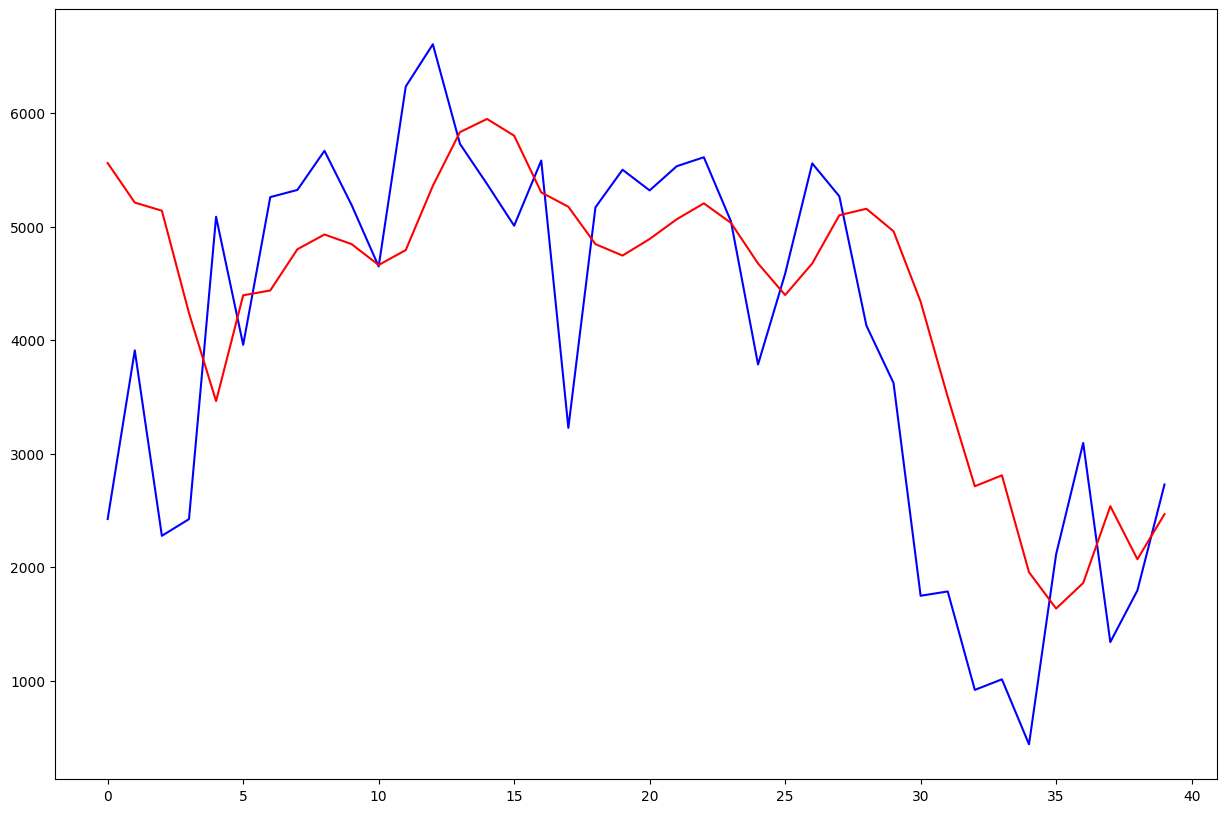

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(df_result['Actual'], color='blue')
plt.plot(df_result['Prediction'], color='red')
plt.show()

In [ ]:
# N-seze of array
# Count steps to convert array into permutations array
lst = []
steps = 0
n = int(input())
for i in range(n):
    x = int(input())
    lst.append(x)
print(lst)
lst.sort()
for i in range(n):
    steps= steps + (lst[i]-(i+1))
print(steps)

4
4
3
2
1
[4, 3, 2, 1]
0


In [ ]:
abs(-3)

3

In [ ]:
ascii(())

'(64, 43, 34)'

In [ ]:
bin(8)

'0b1000'